In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/ADA/Simulation')


In [3]:
from _util import *
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import _analyzer as analyzer

reload(analyzer)
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.gridspec as gridspec


## Concurrent

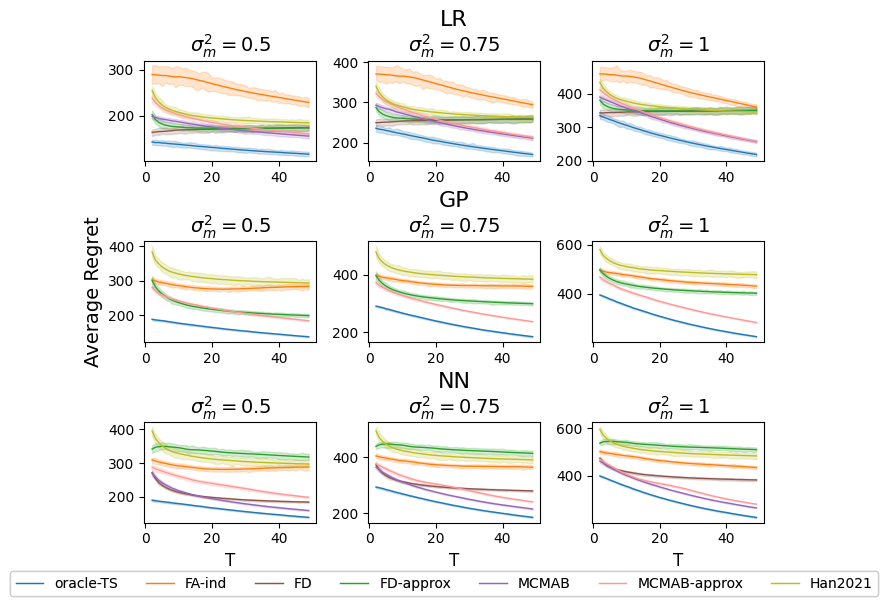

In [ ]:
fig = plt.figure(figsize=(8, 6))
outer = gridspec.GridSpec(3, 1, hspace=.8)
###################################
VAR = [0.5, .75, 1]
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]

palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = ["LMM/_M50_K5_N50_T50_dm3_dk3_sigma_m{}_orderconcurrent/B_min20_B_max30_sigma_eps1",
    "GP/_M50_K5_N50_T50_dm1_dk1_sigma_m{}_orderconcurrent/B_min20_B_max30_sigma_eps1",
    "NN_updated/_M50_K5_N50_T50_dm1_dk2_sigma_m{}_orderconcurrent/lr0.01_NN_L2_NN_m12_sigma_eps1_B_max30_B_min20"]
def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)
###################################
reload(analyzer)
axs = []
###################################
for i in range(3):
    title_pre = ['LR','GP','NN'][i]
    inner = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[i], wspace=0.3)
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
    ax.axis('off')
    fig.add_subplot(ax)
    for j in range(3):
      v = VAR[j]
      p = pp[i].format(v)
      r = load(p)
      ana = analyzer.Analyzer()
      ana.recover_full_recorder(r)
      y_max = y_min = None
      ax = plt.Subplot(fig, inner[j])
      if i == 1:
        ii = 0
      else:
        ii = 1

      w_x_label =False
      if i == 2:
        w_x_label = True
      data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                  ci = 95,
                                                  ax1 = ax, i = ii + j,
                                                  linewidth = 1, y_max = y_max, y_min = y_min,
                                                  w_title = True, new_title = r'$\sigma_m^2 = {}$'.format(v),
                                                  palette_idx = palette_idx, hue_order = hue_order,
                                                  complex_x_label = False,
                                                  ylabel = "Average Regret",
                                                  w_x_label = w_x_label)
      labels[labels.index("CB_base_30")] = "Han2021"
      labels[labels.index("FG")] = "MCMAB"
      labels[labels.index("FG-approx")] = "MCMAB-approx"
      fig.add_subplot(ax)
      axs.append(ax)

    ax.legend(handles, labels, loc='lower center', ncol = len(labels)
              , bbox_to_anchor = [0.5, -4.4]
            , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                   )
fig.show()
###########
fig.savefig("concurrent" + ".png", bbox_inches= "tight", dpi = 200)

## Sequential

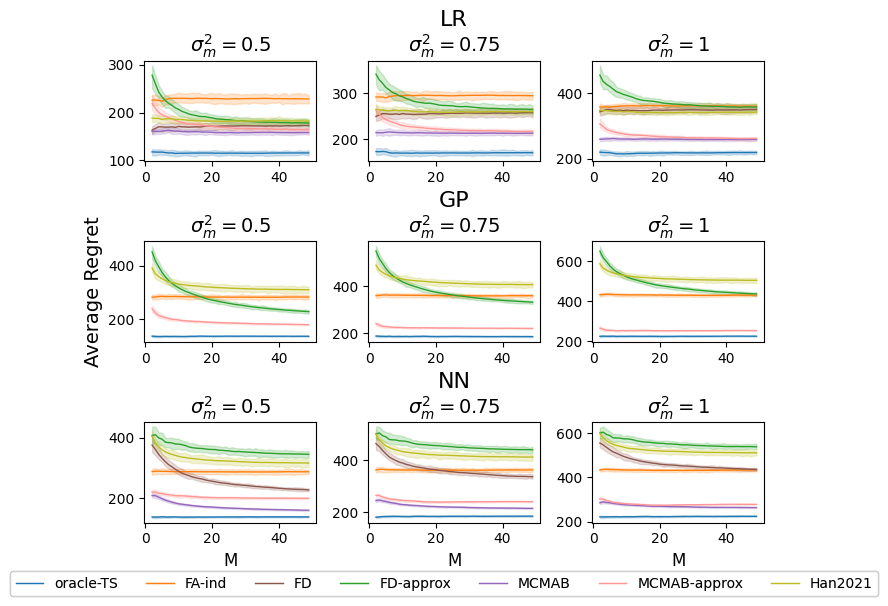

In [ ]:
fig = plt.figure(figsize=(8, 6))
outer = gridspec.GridSpec(3, 1, hspace=.8)
###################################
VAR = [0.5, .75, 1]
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]

palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = ["LMM/_M50_K5_N50_T50_dm3_dk3_sigma_m{}_ordersequential/B_min20_B_max30_sigma_eps1",
    "GP/_M50_K5_N50_T50_dm1_dk1_sigma_m{}_ordersequential/B_min20_B_max30_sigma_eps1",
    "NN_updated/_M50_K5_N50_T50_dm1_dk2_sigma_m{}_ordersequential/lr0.01_NN_L2_NN_m12_sigma_eps1_B_max30_B_min20"]
def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)
###################################
reload(analyzer)
axs = []
###################################
for i in range(3):
    title_pre = ['LR','GP','NN'][i]
    inner = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[i], wspace=0.3)
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
    ax.axis('off')
    fig.add_subplot(ax)
    for j in range(3):
      v = VAR[j]
      p = pp[i].format(v)
      r = load(p)
      ana = analyzer.Analyzer()
      ana.recover_full_recorder(r)
      y_max = y_min = None
      ax = plt.Subplot(fig, inner[j])
      if i == 1:
        ii = 0
      else:
        ii = 1
      w_x_label =False
      if i == 2:
        w_x_label = True
      data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                  ci = 95,
                                                  ax1 = ax, i = ii + j,
                                                  linewidth = 1, y_max = y_max, y_min = y_min,
                                                  w_title = True, new_title = r'$\sigma_m^2 = {}$'.format(v),
                                                  palette_idx = palette_idx, hue_order = hue_order,
                                                  complex_x_label = False,
                                                  ylabel = "Average Regret",
                                                  w_x_label = w_x_label)
      labels[labels.index("CB_base_30")] = "Han2021"
      labels[labels.index("FG")] = "MCMAB"
      labels[labels.index("FG-approx")] = "MCMAB-approx"
      fig.add_subplot(ax)
      axs.append(ax)

    ax.legend(handles, labels, loc='lower center', ncol = len(labels)
              , bbox_to_anchor = [0.5, -4.4]
            , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                   )
fig.show()
###########
fig.savefig("sequential" + ".png", bbox_inches= "tight", dpi = 200)

## LMM: K

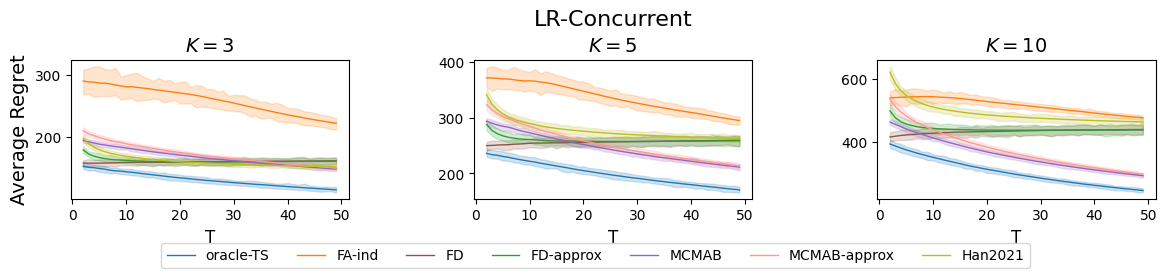

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
K = [3,5,10] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]
palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/_M50_K{}_N50_T50_dm3_dk3_sigma_m0.75_orderconcurrent/B_min20_B_max30_sigma_eps1"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = K[j]
    p = pp.format(v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$K = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_Ks_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## LMM: M

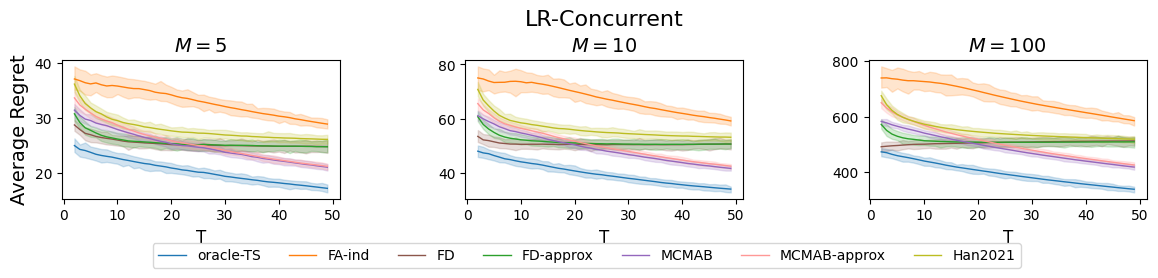

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
M = [5,10,100] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]
palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/_M{}_K5_N50_T50_dm3_dk3_sigma_m0.75_orderconcurrent/B_min20_B_max30_sigma_eps1"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = M[j]
    p = pp.format(v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$M = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_Ms_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## LMM: N

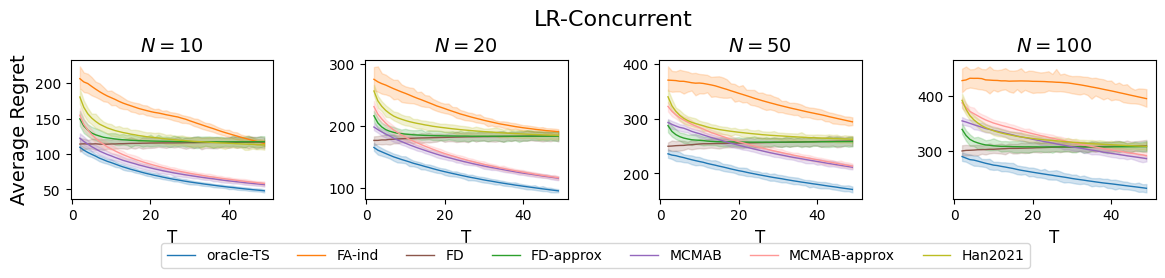

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
N = [10,20,50,100] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]

palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/TrendN/_M50_K5_N{}_T50_dm3_dk3_sigma_m0.75_orderconcurrent/B_min20_B_max30_sigma_eps1"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 4,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 4,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(4):
    v = N[j]
    p = pp.format(v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$N = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_Ns_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


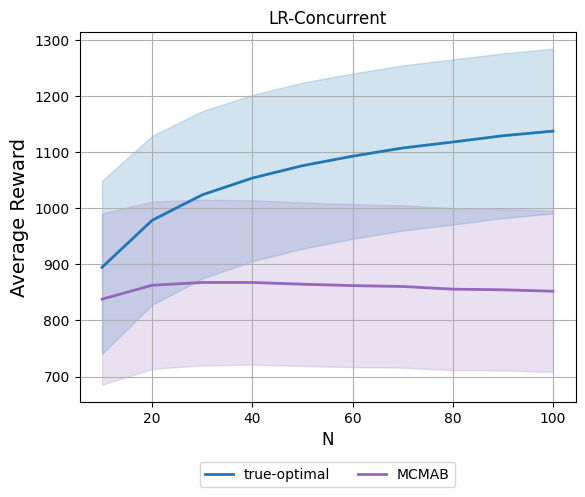

In [ ]:
def get_tableau20():
    # These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)
    return tableau20
###################################
N = [10,20,30,40,50,60,70,80,90,100]
pp = "LMM/TrendN/_M50_K5_N{}_T50_dm3_dk3_sigma_m0.75_orderconcurrent/B_min20_B_max30_sigma_eps1"
###################################
reload(analyzer)
fig, ax = plt.subplots()
###################################
result = pd.DataFrame()
for j in range(len(N)):
    v = N[j]
    p = pp.format(v)
    r = load(p)
    out1 = r['record']['data_plot_R_original'][(r['record']['data_plot_R_original'].method == 'oracle-TS') & (r['record']['data_plot_R_original'].time == 49)]
    out1['regret'] += r['record']['data_plot_BR_original'][(r['record']['data_plot_BR_original'].method == 'oracle-TS') & (r['record']['data_plot_BR_original'].time == 49)]['regret']
    out1['method'] = 'true-optimal'
    out2 = r['record']['data_plot_R_original'][(r['record']['data_plot_R_original'].method == 'FG')  & (r['record']['data_plot_R_original'].time == 49)]
    out = pd.concat([out1, out2], ignore_index = True)
    out['N'] = v
    result = pd.concat([result, out], ignore_index=True)
result.regret = result.regret/(result.time+1)


from matplotlib.transforms import BlendedGenericTransform
COLORS = get_tableau20() #sns.color_palette("tab10")
palette_idx = {'true-optimal' : 0, 'FG' : 7}
palette = {name : COLORS[idx] for name, idx in palette_idx.items()}
##########################################
line = sns.lineplot(data=result, x = "N", y="regret", hue="method", errorbar=("se", 2), ax = ax, n_boot = 1000, palette = palette,
                    linewidth = 2, hue_order = ['true-optimal', 'FG'])
ax.set_title('LR-Concurrent')
ax.set_xlabel('N', fontsize= 12)
ax.set_ylabel('Average Reward', fontsize= 14)
#########
handles, labels = ax.get_legend_handles_labels()
labels[labels.index("FG")] = "MCMAB"
ax.grid(True)
ax.legend(handles, labels, loc='lower center', ncol = len(labels), bbox_to_anchor = [0.5, -0.25])
fig.show()
###########
fig.savefig("LMM_Ns_concurrent_trends" + ".png"
                   , bbox_inches= "tight", dpi = 200)

## LMM: sigma_eps

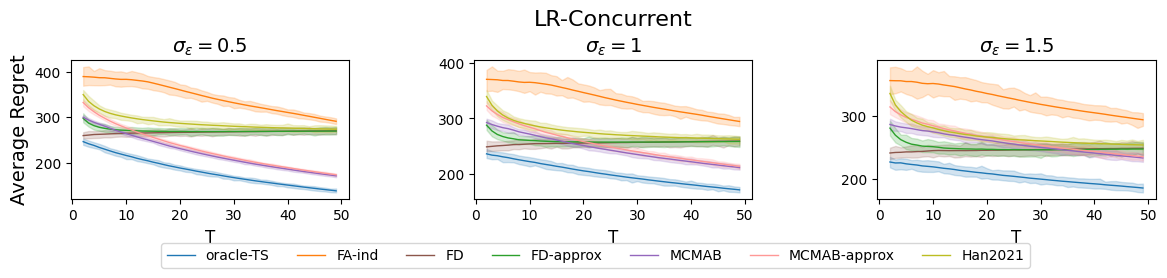

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
Sigma_eps = [.5, 1, 1.5] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]
palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/_M50_K5_N50_T50_dm3_dk3_sigma_m0.75_orderconcurrent/sigma_eps{}_B_max30_B_min20"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = Sigma_eps[j]
    p = pp.format(v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$\sigma_\epsilon = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_sigmas_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## LMM: d

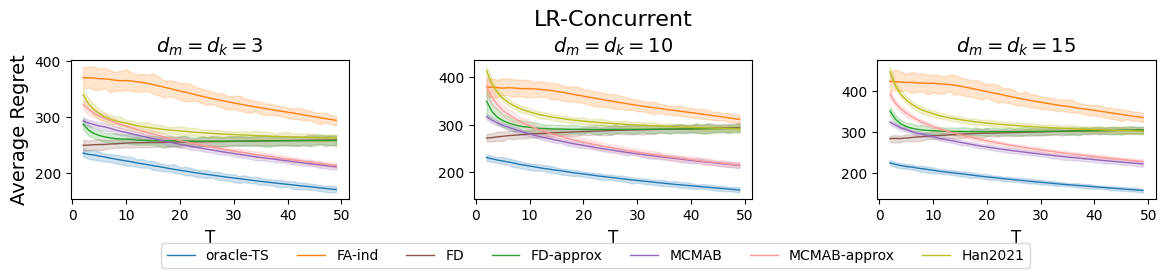

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
d = [3, 10, 15] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]
palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/_M50_K5_N50_T50_dm{}_dk{}_sigma_m0.75_orderconcurrent/B_min20_B_max30_sigma_eps1"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = d[j]
    p = pp.format(v,v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$d_m = d_k = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_ds_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## LMM: B

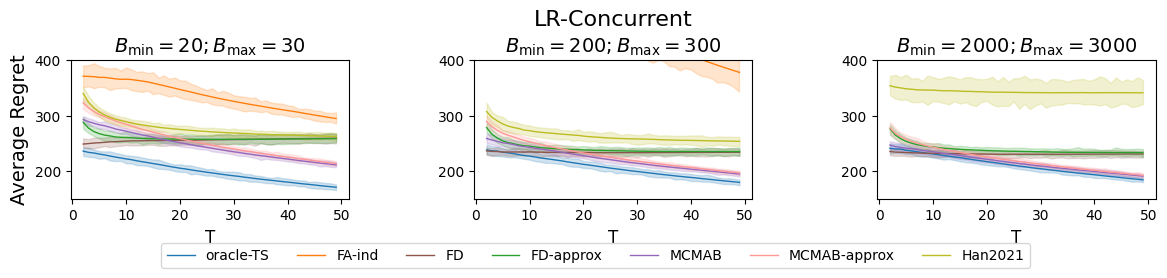

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
B = [10, 100, 1000] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]#,"CB_base_100"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]
palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "LMM/_M50_K5_N50_T50_dm3_dk3_sigma_m0.75_orderconcurrent/sigma_eps1_B_max{}_B_min{}"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['LR-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = B[j]
    p = pp.format(v*3,v*2)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    y_max = 400
    y_min = 150
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r"$B_{{\mathrm{{min}}}} = {}; B_{{\mathrm{{max}}}} = {}$".format(v*2, v*3),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    #labels[labels.index("CB_base_100")] = "Han2020_LR_100"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("LMM_Bs_concurrent" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## GP

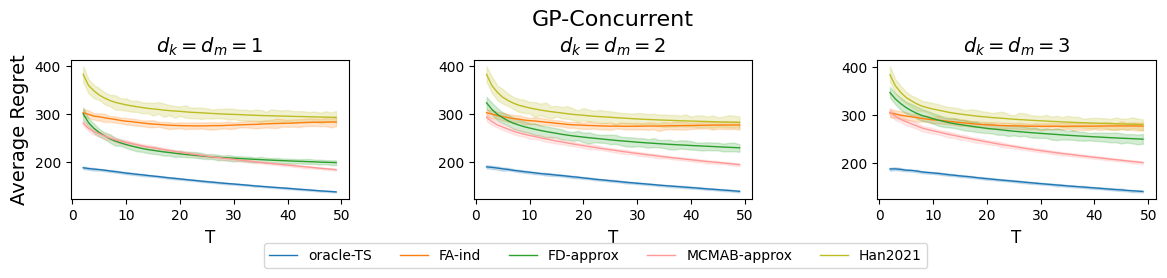

In [ ]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
d = [1,2,3] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind","FD-approx", "FG-approx","CB_base_30"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]

palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = "GP/_M50_K5_N50_T50_dm{}_dk{}_sigma_m0.5_orderconcurrent/B_min20_B_max30_sigma_eps1"

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['GP-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = d[j]
    p = pp.format(v,v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$d_k = d_m = {}$'.format(v),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("GP_ds_concurrent" + ".png", bbox_inches= "tight", dpi = 200)


## NN

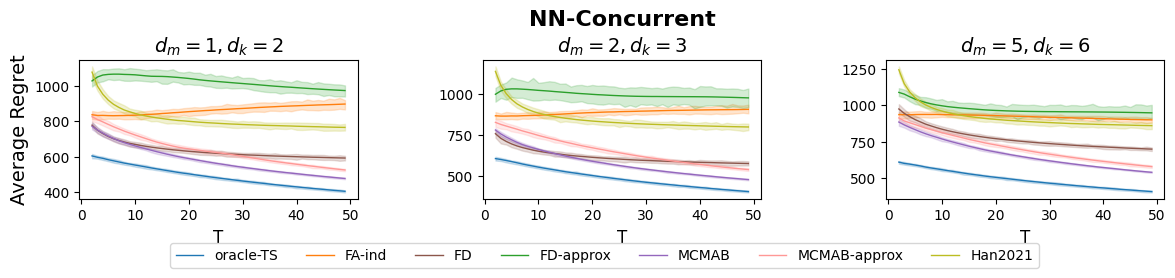

In [4]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 1, wspace=0.14)
###################################
d = [1,2,5] # , 0.1 # , 1
hue_order = ["oracle-TS","FA-ind", "FD","FD-approx", "FG", "FG-approx","CB_base_30"]
skip_methods = []
plot_which = "BR"

y_mins = [20, 20, 20]
y_maxs = [55, 100, 100]

palette_idx = {'oracle-TS' : 0, 'FA-ind' : 1, "FD" : 9,'FD-approx' : 3, 'FG-approx' : 6,'FG' : 7, 'CB_base_30' : 15}
pp = ["NN_updated/_M100_K10_N50_T50_dm1_dk2_sigma_m0.5_orderconcurrent/lr0.01_NN_L2_NN_m12_sigma_eps1_B_max30_B_min20",
    "NN_updated/_M100_K10_N50_T50_dm2_dk3_sigma_m0.5_orderconcurrent/lr0.01_NN_L3_NN_m14_sigma_eps1_B_max30_B_min20",
    "NN_updated/_M100_K10_N50_T50_dm5_dk6_sigma_m0.5_orderconcurrent/lr0.01_NN_L3_NN_m20_sigma_eps1_B_max30_B_min20"]

def GP_prior_f_mu(x):  # same as the environment setup
    #return x.sum(1)
    return (abs(x)).sum(1)
    #return 10*np.ones(np.shape(x)[0])
def prior_f_mu_env(X):
    return (abs(X)).sum(2)

###################################
reload(analyzer)
axs = []
###################################
i = 0
# o = ['concurrent', 'episodic'][i]
o = ['concurrent'][i]
title_pre = ['NN-Concurrent'][i]
if i == 0:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.45)
else:
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
ax = plt.Subplot(fig, outer[i])
ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
ax.axis('off')
fig.add_subplot(ax)

for j in range(3):
    v = d[j]
    r = load(pp[j])
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    if i == 1:
        y_min = y_mins[j]
        y_max = y_maxs[j]
    else:
        y_max = y_min = None
    ax = plt.Subplot(fig, inner[j])
    data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = ['OSFA'],
                                                 ci = 95,
                                                 ax1 = ax, i = i + j,
                                                 linewidth = 1, y_max = y_max, y_min = y_min,
                                                 w_title = True, new_title = r'$d_m = {}, d_k = {}$'.format(v, v+1),
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average Regret")
    labels[labels.index("CB_base_30")] = "Han2021"
    labels[labels.index("FG")] = "MCMAB"
    labels[labels.index("FG-approx")] = "MCMAB-approx"
    fig.add_subplot(ax)
    axs.append(ax)
ax.legend(handles, labels, loc='lower center', ncol = len(labels)
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )


fig.show()
###########
fig.savefig("NN_ds_concurrent" + ".png", bbox_inches= "tight", dpi = 200)


## Real

100%|██████████| 100/100 [00:00<00:00, 457.79it/s]


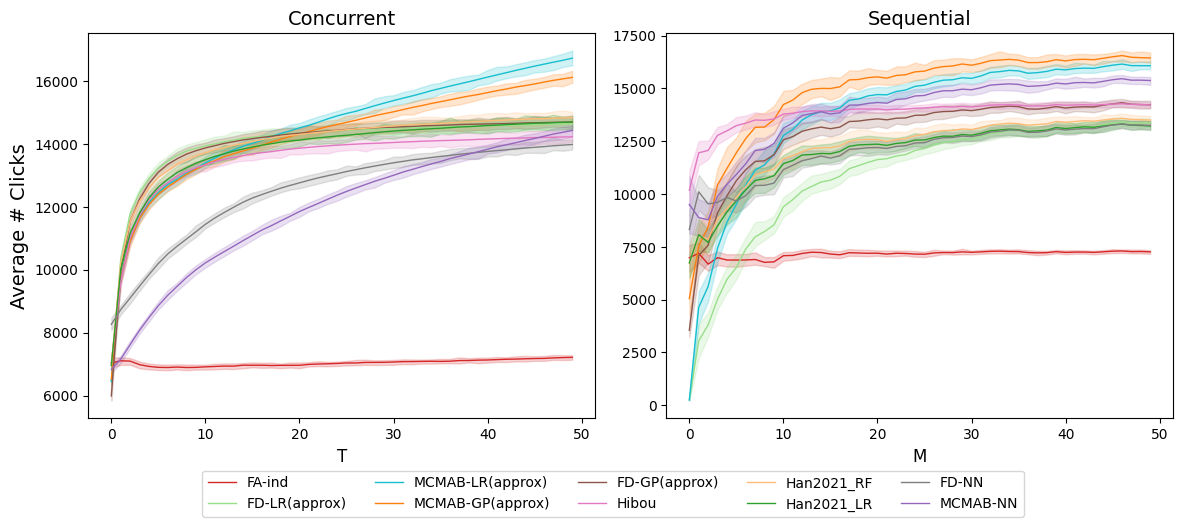

In [ ]:
fig = plt.figure(figsize=(14, 5))
outer = gridspec.GridSpec(1, 2, wspace=0.14)
###################################
hue_order = ["FA-ind","LMM-FD_1", "LMM-FG_1","GP-FG","GP-FD", "Hibou","CB_base_RF", "CB_base_LR", "NN-FD","NN-FG"]
skip_methods = []
plot_which = "R"
plot_mean = True

palette_idx = {"FA-ind":5,'LMM-FD_1' : 4, 'LMM-FG_1' : 17,
              "GP-FG": 1, "GP-FD" : 9, "Hibou": 11,
               "CB_base_RF": 2, "CB_base_LR":3, "NN-FD":13,"NN-FG":7}
###################################
reload(analyzer)
axs = []
title = ['Concurrent', 'Sequential']
###################################
i = 0
ax = plt.Subplot(fig, outer[i])

r1 = load("Real/final_concurrent/others")
r2 = load("Real/final_concurrent/NN_m30_L3_selected")

r2['record'] = {seed : r2['record'][seed]['R'] for seed in range(len(r2['record']))}
ana = analyzer.Analyzer()
ana.recover_full_recorder(r2, only_plot_matrix = False)
data_plot_BR, data_plot_R = ana.prepare_data_4_plot(plot_which = 'R')
r2['record'] = {'data_plot_BR_original':ana.data_plot_BR_original,'data_plot_R_original':ana.data_plot_R_original}

r3 = load("Real/final_concurrent/updated_Hibou")
r = {'record':dict(), 'name': r1['name'], 'setting':r1['setting']}

for key in list(r2['record'].keys()):
    df1 = r1['record'][key][r1['record'][key].method != 'Hibou']
    df2 = r2['record'][key][r2['record'][key].method != 'oracle-TS']
    df3 = r3['record'][key][r3['record'][key].method != 'oracle-TS']
    r['record'][key] = pd.concat([df1, df2, df3], axis=0)

###################################
ana = analyzer.Analyzer()
ana.recover_full_recorder(r)

data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = plot_mean, skip_methods = ["oracle-TS","OSFA"],
                                                 ci = 95,
                                                 ax1 = ax, i = 0,
                                                 linewidth = 1, y_max = None, y_min = None,
                                                 w_title = True, new_title = 'Concurrent',
                                                 palette_idx = palette_idx, hue_order = hue_order,
                                                 complex_x_label = False,
                                                 ylabel = "Average # Clicks")
labels[labels.index("CB_base_RF")] = "Han2021_RF"
labels[labels.index("CB_base_LR")] = "Han2021_LR"
labels[labels.index("LMM-FD_1")] = "MCMAB-LR(approx)"
labels[labels.index("LMM-FG_1")] = "MCMAB-LR(approx)"
labels[labels.index("GP-FD")] = "MCMAB-GP(approx)"
labels[labels.index("GP-FG")] = "MCMAB-GP(approx)"
labels[labels.index("NN-FD")] = "MCMAB-NN"
labels[labels.index("NN-FG")] = "MCMAB-NN"
fig.add_subplot(ax)
axs.append(ax)


i = 1
ax = plt.Subplot(fig, outer[i])
r1 = load("Real/final_sequential/kernelRBF_kernel_gamma_factor1_ordersequential_env_settingreal_exp_episode2_refresh_threshold500_augment_size130_augment_size21000-sequential_real_hibou")
r1['record'] = {seed : r1['record'][seed]['R'] for seed in range(len(r1['record']))}
ana = analyzer.Analyzer()
ana.recover_full_recorder(r1, only_plot_matrix = False)
data_plot_BR, data_plot_R = ana.prepare_data_4_plot(plot_which = 'R')
r1['record'] = {'data_plot_BR_original':ana.data_plot_BR_original,'data_plot_R_original':ana.data_plot_R_original}

r2 = load("Real/final_sequential/kernelRBF_kernel_gamma_factor1_env_settingreal_NN_m26_NN_L3_NN_reg1_NN_nu1_exp_episode2_refresh_threshold2000_augment_size130_augment_size21000-NN_precise_sequential")
ana = analyzer.Analyzer()
ana.recover_full_recorder(r2, only_plot_matrix = False)
data_plot_BR, data_plot_R = ana.prepare_data_4_plot(plot_which = 'R')
r2['record'] = {'data_plot_BR_original':ana.data_plot_BR_original,'data_plot_R_original':ana.data_plot_R_original}

r = {'record':dict(), 'name': r1['name'], 'setting':r1['setting']}

for key in list(r2['record'].keys()):
    df1 = r1['record'][key]
    df2 = r2['record'][key][r2['record'][key].method != 'oracle-TS']
    r['record'][key] = pd.concat([df1, df2, df3], axis=0)

###################################
ana = analyzer.Analyzer()
ana.recover_full_recorder(r)

data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = plot_mean, skip_methods = ["oracle-TS","OSFA"],
                                             ci = 95,ax1 = ax, i = 1,linewidth = 1,
                                             y_max = None, y_min = None,w_title = True,
                                             new_title = 'Sequential',
                                             palette_idx = palette_idx, hue_order = hue_order,
                                            complex_x_label = False,
                                              ylabel = "Average # Clicks")
labels[labels.index("CB_base_RF")] = "Han2021_RF"
labels[labels.index("CB_base_LR")] = "Han2021_LR"
labels[labels.index("LMM-FD_1")] = "FD-LR(approx)"
labels[labels.index("LMM-FG_1")] = "MCMAB-LR(approx)"
labels[labels.index("GP-FD")] = "FD-GP(approx)"
labels[labels.index("GP-FG")] = "MCMAB-GP(approx)"
labels[labels.index("NN-FD")] = "FD-NN"
labels[labels.index("NN-FG")] = "MCMAB-NN"
fig.add_subplot(ax)
axs.append(ax)


ax.legend(handles, labels, loc='lower center', ncol = len(labels)//2, bbox_to_anchor = [0.5, -.275],
          bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )
fig.show()
###########
fig.savefig("Real" + ".pdf", bbox_inches= "tight", dpi = 200)


In [ ]:
r['record']['data_plot_R_original'][r['record']['data_plot_R_original'].time == 49].groupby('method').mean()

,regret,time
method,,
CB_base_LR,14694.030049,49.0
CB_base_RF,14830.301646,49.0
FA-ind,7215.883644,49.0
GP-FD,14691.533363,49.0
GP-FG,16108.695849,49.0
Hibou,14222.361620,49.0
LMM-FD_1,14634.758038,49.0
LMM-FG_1,16719.627754,49.0
NN-FD,13978.025260,49.0


In [ ]:
(16719.627754-14222.361620)/14222.361620

0.1755873040443758

In [ ]:
i = 1
ax = plt.Subplot(fig, outer[i])
r1 = load("Real/final_sequential/kernelRBF_kernel_gamma_factor1_ordersequential_env_settingreal_exp_episode2_refresh_threshold500_augment_size130_augment_size21000-sequential_real_hibou")
r1['record'] = {seed : r1['record'][seed]['R'] for seed in range(len(r1['record']))}
ana = analyzer.Analyzer()
ana.recover_full_recorder(r1, only_plot_matrix = False)
data_plot_BR, data_plot_R = ana.prepare_data_4_plot(plot_which = 'R')
r1['record'] = {'data_plot_BR_original':ana.data_plot_BR_original,'data_plot_R_original':ana.data_plot_R_original}

r2 = load("Real/final_sequential/kernelRBF_kernel_gamma_factor1_env_settingreal_NN_m26_NN_L3_NN_reg1_NN_nu1_exp_episode2_refresh_threshold2000_augment_size130_augment_size21000-NN_precise_sequential")
ana = analyzer.Analyzer()
ana.recover_full_recorder(r2, only_plot_matrix = False)
data_plot_BR, data_plot_R = ana.prepare_data_4_plot(plot_which = 'R')
r2['record'] = {'data_plot_BR_original':ana.data_plot_BR_original,'data_plot_R_original':ana.data_plot_R_original}

r = {'record':dict(), 'name': r1['name'], 'setting':r1['setting']}

for key in list(r2['record'].keys()):
    df1 = r1['record'][key]
    df2 = r2['record'][key][r2['record'][key].method != 'oracle-TS']
    r['record'][key] = pd.concat([df1, df2, df3], axis=0)

###################################
ana = analyzer.Analyzer()
ana.recover_full_recorder(r)

data_plot, handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = plot_mean, skip_methods = ["oracle-TS","OSFA"],
                                             ci = 95,ax1 = ax, i = 1,linewidth = 1,
                                             y_max = None, y_min = None,w_title = True,
                                             new_title = 'Sequential',
                                             palette_idx = palette_idx, hue_order = hue_order,
                                            complex_x_label = False,
                                              ylabel = "Average # Clicks")
labels[labels.index("CB_base_RF")] = "Han2021_RF"
labels[labels.index("CB_base_LR")] = "Han2021_LR"
labels[labels.index("LMM-FD_1")] = "LR-FD"
labels[labels.index("LMM-FG_1")] = "LR-FG"
fig.add_subplot(ax)
axs.append(ax)

100%|██████████| 100/100 [00:00<00:00, 582.54it/s]


In [ ]:
r['record']['data_plot_R_original'][r['record']['data_plot_R_original'].time == 49].groupby('method').mean()

,regret,time
method,,
CB_base_LR,13220.231584,49.0
CB_base_RF,13501.013405,49.0
FA-ind,7262.616112,49.0
GP-FD,14224.848684,49.0
GP-FG,16442.304643,49.0
Hibou,14222.361620,49.0
LMM-FD_1,13364.001021,49.0
LMM-FG_1,16074.965974,49.0
NN-FD,13246.333574,49.0


In [ ]:
(16442.304643-14222.361620)/14222.361620

0.15608821392069203